In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tensorflow.keras.utils import plot_model
from sklearn.datasets import load_breast_cancer
from matplotlib.ticker import MaxNLocator

In [4]:
breast_cancer=load_breast_cancer()
 
x=breast_cancer.data
y=breast_cancer.target

In [5]:
def get_model(neurons_layer,activation):
    np.random.seed(5)
    tf.random.set_seed(5)


    model=Sequential()
    for index,neurons in enumerate(neurons_layer):
        if (index==0):
            model.add(Dense(neurons, activation=activation,input_dim=x.shape[1]))
        else:
            model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error')

    return model

In [6]:
def plot_metrics(title,history,axes):
    axes.plot(history['loss'])
    axes.set_xlabel('épocas')  
    axes.set_ylabel('loss')
    axes.set_title(title, fontsize=20)
    axes.set_ylim(ymin=0,ymax=0.4)
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))



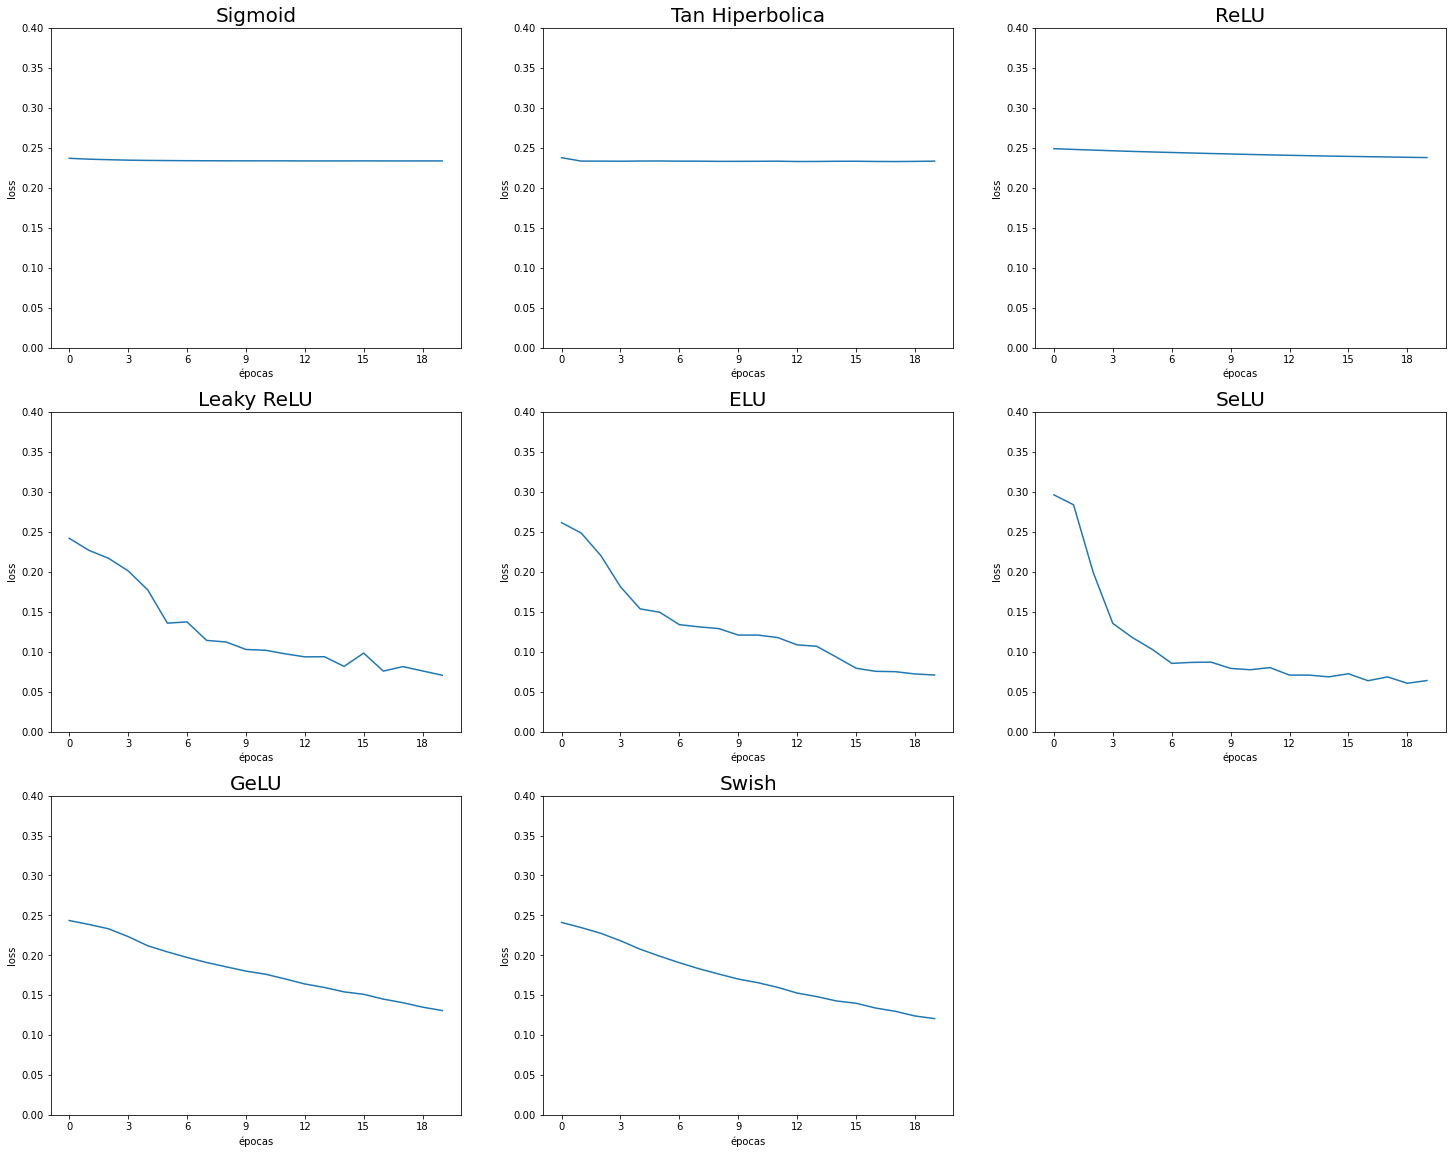

In [7]:
activations=[
        ("Sigmoid","sigmoid"),
        ("Tan Hiperbolica","tanh"),
        ("ReLU","relu"),
        ("Leaky ReLU",tf.keras.layers.LeakyReLU()),
        ("ELU","elu"),
        ("SeLU","selu"),
        ("GeLU","gelu"),        
        ("Swish","swish")]



neurons_layer=[2,4,8,16,20,16,8,4,2]

figure=plt.figure(figsize=(25,20))
for index,(name,activation) in enumerate(activations):
        model=get_model(neurons_layer,activation)
        history=model.fit(x, y,epochs=20,verbose=False)

        axes = figure.add_subplot(3,3,index+1)
        plot_metrics(name,history.history,axes)

In [17]:

activations={
        "Tan Hiperbolica":"tanh",
        "ELU":"elu"
}

for index,(name,activation) in enumerate(activations.items()):
    print(name,activation)

Tan Hiperbolica tanh
ELU elu
